## Problem Statement: PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORK

In [1]:
#importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
# Making DataFrame
df = pd.read_csv(r'/content/forestfires (1).csv')

## EDA

In [3]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
df.shape

(517, 31)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
df.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [7]:
df.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

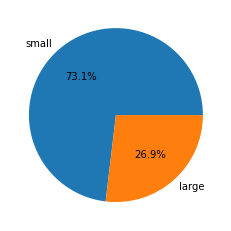

<Figure size 432x288 with 0 Axes>

In [8]:
labels = df.size_category.unique()
plt.pie(df.size_category.value_counts(), autopct='%1.1f%%', labels=labels)
plt.show()
plt.tight_layout()

In [9]:
# Creating a new a dataframe without onehotencoded values
df1 = pd.DataFrame(df[['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']])

In [10]:
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [11]:
df1.month.value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

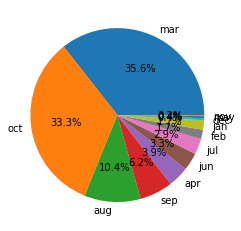

<Figure size 432x288 with 0 Axes>

In [12]:
labels = df1.month.unique()
plt.pie(df1.month.value_counts(), autopct='%1.1f%%', labels=labels)
plt.show()
plt.tight_layout()

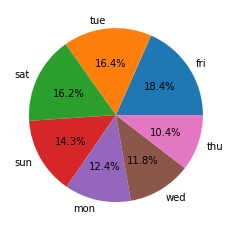

<Figure size 432x288 with 0 Axes>

In [13]:
labels = df1.day.unique()
plt.pie(df1.day.value_counts(), autopct='%1.1f%%', labels=labels)
plt.show()
plt.tight_layout()

## Correlation, Skewness and Kurtosis

In [14]:
df1.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


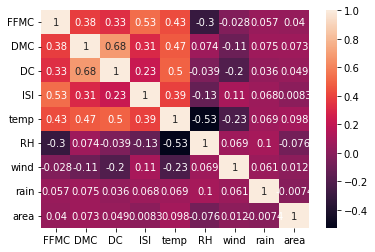

In [15]:
sns.heatmap(df1.corr(), annot=True)

In [16]:
df1.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


FFMC    -6.575606
DMC      0.547498
DC      -1.100445
ISI      2.536325
temp    -0.331172
RH       0.862904
wind     0.571001
rain    19.816344
area    12.846934
dtype: float64

#### DMC, ISI, RH, wind, rain, area are Positively Skewed
#### FFMC, DC, temp are Negatively Skewed

In [17]:
df1.kurtosis()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


FFMC     67.066041
DMC       0.204822
DC       -0.245244
ISI      21.458037
temp      0.136166
RH        0.438183
wind      0.054324
rain    421.295964
area    194.140721
dtype: float64

#### FFMC, DMC, ISI, temp, RH, wind, rain, area has Positive Kurtosis
#### DC has Negative Kurtosis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


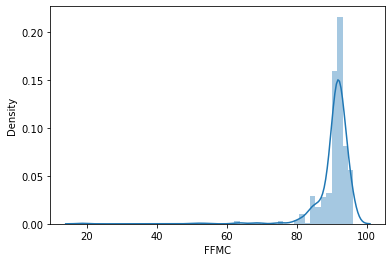

In [18]:
sns.distplot(df1['FFMC'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


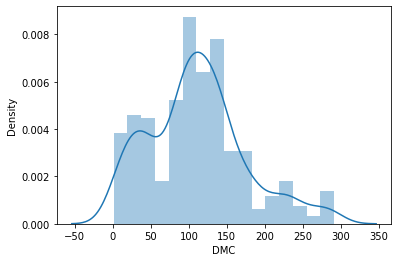

In [19]:
sns.distplot(df1['DMC'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


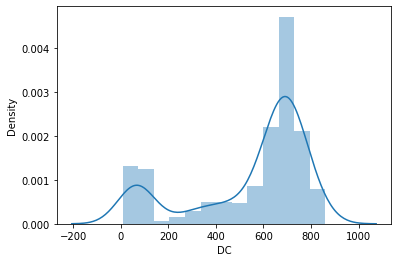

In [20]:
sns.distplot(df1['DC'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


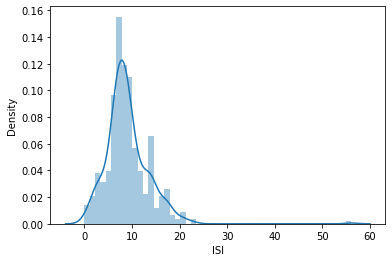

In [21]:
sns.distplot(df1['ISI'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


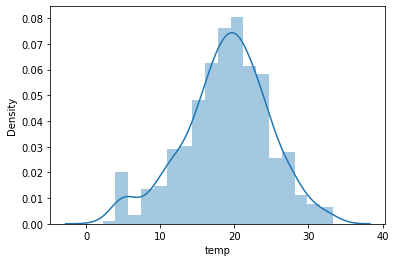

In [22]:
sns.distplot(df1['temp'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


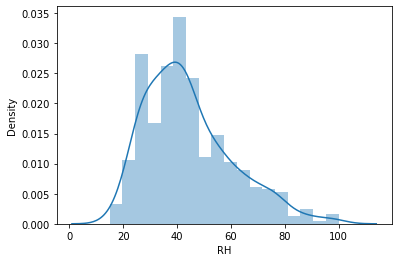

In [23]:
sns.distplot(df1['RH'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


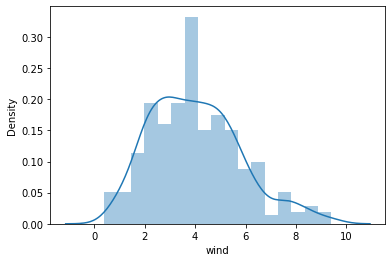

In [24]:
sns.distplot(df1['wind'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


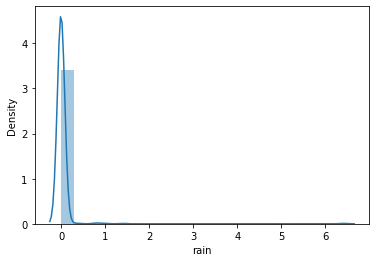

In [25]:
sns.distplot(df1['rain'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


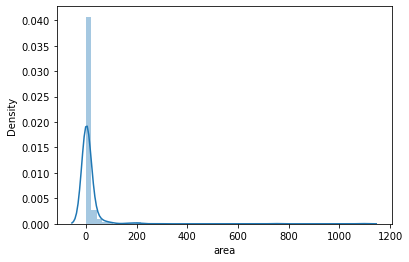

In [26]:
sns.distplot(df1['area'])

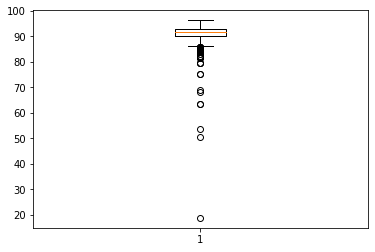

<Figure size 432x288 with 0 Axes>

In [27]:
plt.boxplot(df1['FFMC'])
plt.show()
plt.tight_layout()

#### From the Boxplot the Median is around 95, There are outliers in the lower Quartile

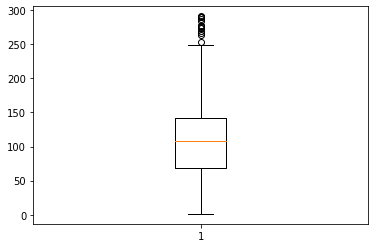

<Figure size 432x288 with 0 Axes>

In [28]:
plt.boxplot(df1['DMC'])
plt.show()
plt.tight_layout()

#### From the Boxplot the Median is around 100, There are outliers in the Upper Quartile

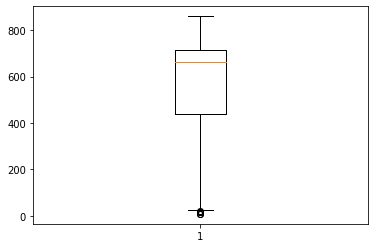

<Figure size 432x288 with 0 Axes>

In [29]:
plt.boxplot(df1['DC'])
plt.show()
plt.tight_layout()

#### From the Boxplot the Median is around 800, There are outliers in the Lower Quartile

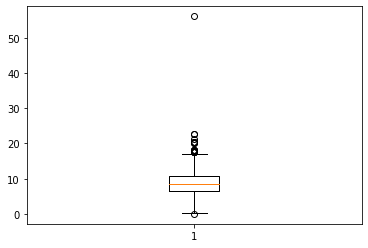

<Figure size 432x288 with 0 Axes>

In [30]:
plt.boxplot(df1['ISI'])
plt.show()
plt.tight_layout()

#### From the Boxplot the Median is around 10, There are outliers in the Upper Quartile

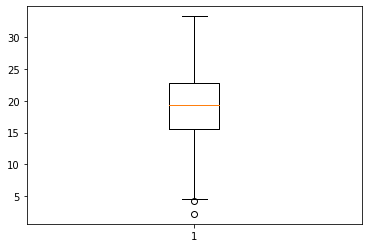

<Figure size 432x288 with 0 Axes>

In [31]:
plt.boxplot(df1['temp'])
plt.show()
plt.tight_layout()

#### From the Boxplot the Median is around 20, There are outliers in the lower Quartile

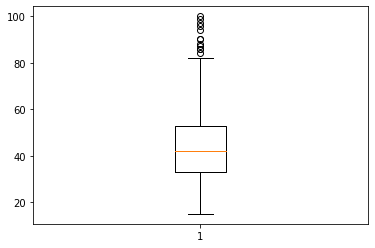

<Figure size 432x288 with 0 Axes>

In [32]:
plt.boxplot(df1['RH'])
plt.show()
plt.tight_layout()

#### From the Boxplot the Median is around 40, There are outliers in the Upper Quartile

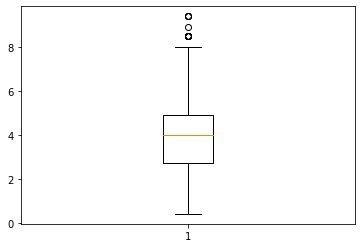

<Figure size 432x288 with 0 Axes>

In [33]:
plt.boxplot(df1['wind'])
plt.show()
plt.tight_layout()

#### From the Boxplot the Median is around 4, There are outliers in the Upper Quartile

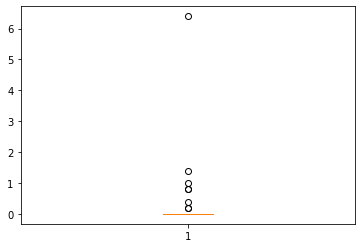

<Figure size 432x288 with 0 Axes>

In [34]:
plt.boxplot(df1['rain'])
plt.show()
plt.tight_layout()

#### From the Boxplot the Median is around 0, There are outliers in the Upper Quartile

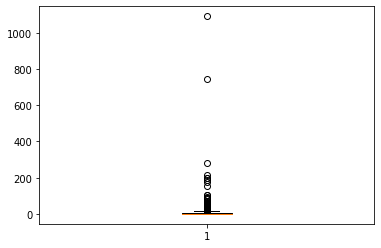

<Figure size 432x288 with 0 Axes>

In [35]:
plt.boxplot(df1['area'])
plt.show()
plt.tight_layout()

#### From the Boxplot the Median is around 0, There are outliers in the Upper Quartile

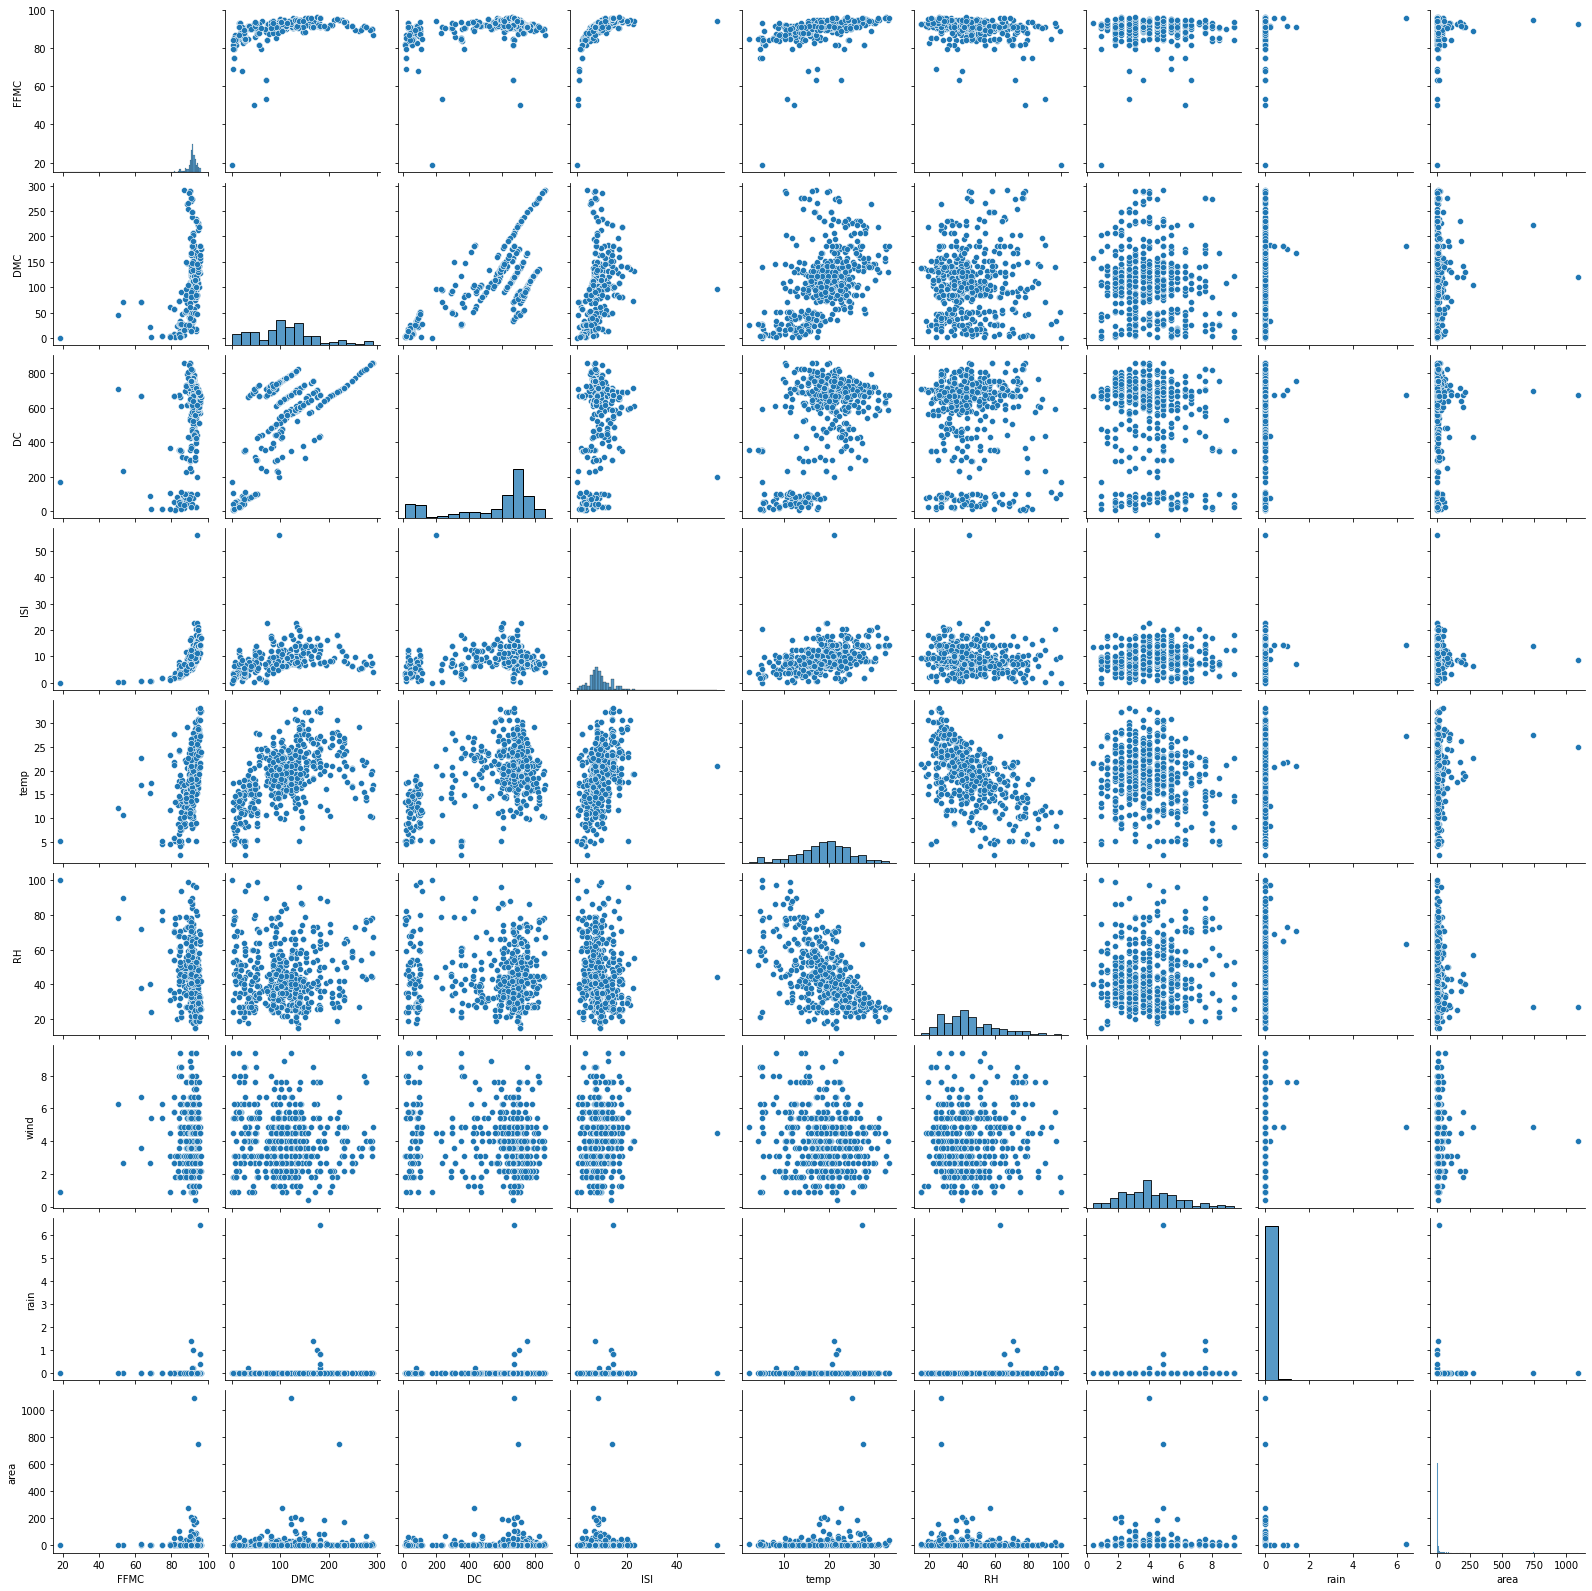

In [36]:
# Plotting a pairplot
sns.pairplot(df1)

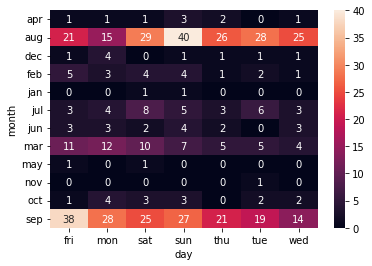

In [37]:
sns.heatmap(pd.crosstab(df1['month'], df1['day']), annot=True)

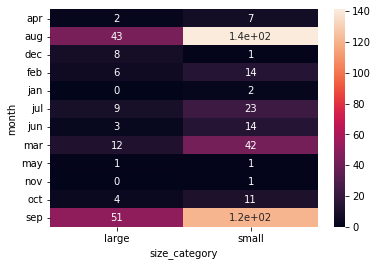

In [38]:
sns.heatmap(pd.crosstab(df1['month'], df['size_category']), annot=True)

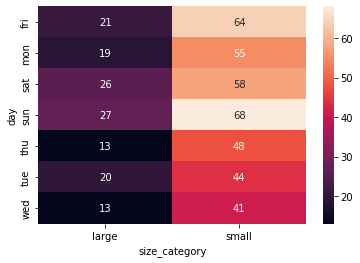

In [39]:
sns.heatmap(pd.crosstab(df1['day'], df['size_category']), annot=True)

## Plotting Boxplot for checking outliers between Numeric and Categorical variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


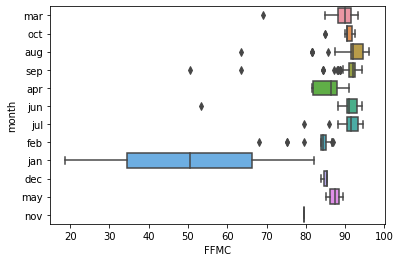

<Figure size 432x288 with 0 Axes>

In [40]:
sns.boxplot(df1['FFMC'], df1['month'])
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


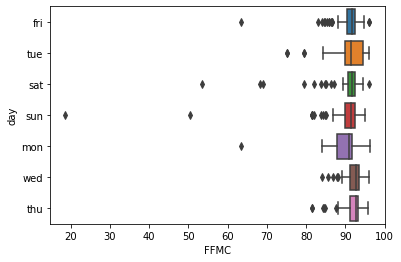

<Figure size 432x288 with 0 Axes>

In [41]:
sns.boxplot(df1['FFMC'], df1['day'])
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


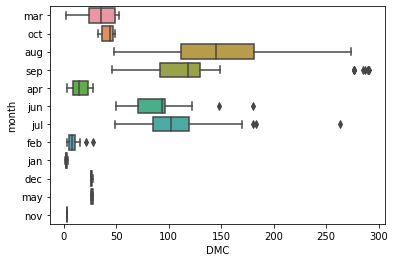

<Figure size 432x288 with 0 Axes>

In [42]:
sns.boxplot(df1['DMC'], df1['month'])
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


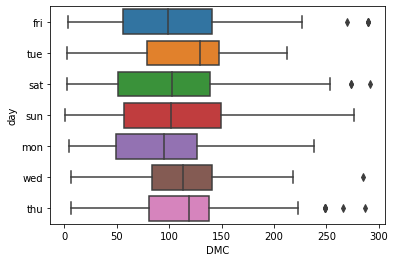

<Figure size 432x288 with 0 Axes>

In [43]:
sns.boxplot(df1['DMC'], df1['day'])
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


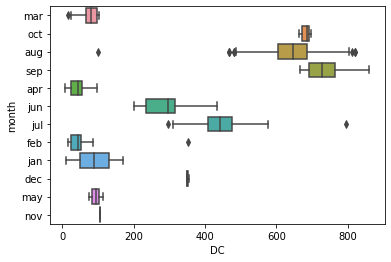

<Figure size 432x288 with 0 Axes>

In [44]:
sns.boxplot(df1['DC'], df1['month'])
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


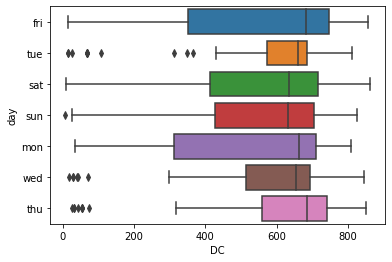

<Figure size 432x288 with 0 Axes>

In [45]:
sns.boxplot(df1['DC'], df1['day'])
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


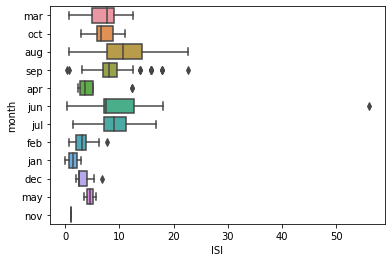

<Figure size 432x288 with 0 Axes>

In [46]:
sns.boxplot(df1['ISI'], df1['month'])
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


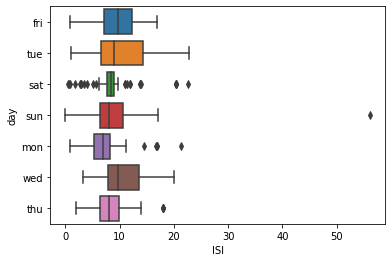

<Figure size 432x288 with 0 Axes>

In [47]:
sns.boxplot(df1['ISI'], df1['day'])
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


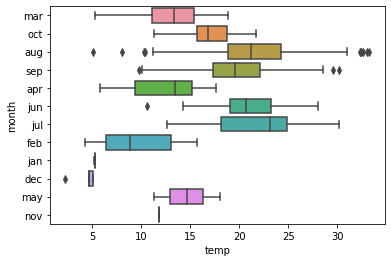

<Figure size 432x288 with 0 Axes>

In [48]:
sns.boxplot(df1['temp'], df1['month'])
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


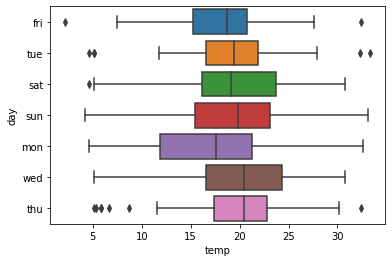

<Figure size 432x288 with 0 Axes>

In [49]:
sns.boxplot(df1['temp'], df1['day'])
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


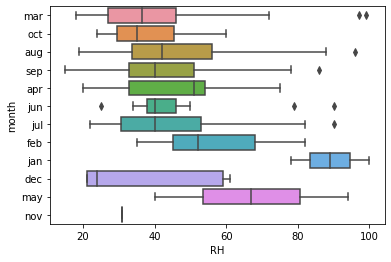

<Figure size 432x288 with 0 Axes>

In [50]:
sns.boxplot(df1['RH'], df1['month'])
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


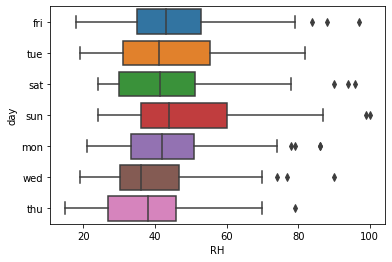

<Figure size 432x288 with 0 Axes>

In [51]:
sns.boxplot(df1['RH'], df1['day'])
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


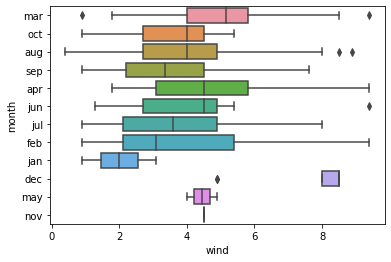

<Figure size 432x288 with 0 Axes>

In [52]:
sns.boxplot(df1['wind'], df1['month'])
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


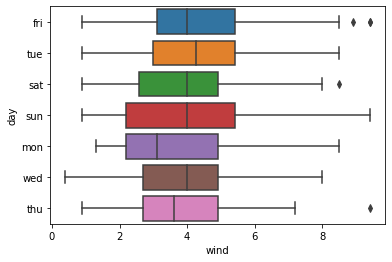

<Figure size 432x288 with 0 Axes>

In [53]:
sns.boxplot(df1['wind'], df1['day'])
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


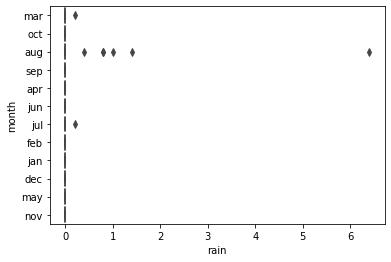

<Figure size 432x288 with 0 Axes>

In [54]:
sns.boxplot(df1['rain'], df1['month'])
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


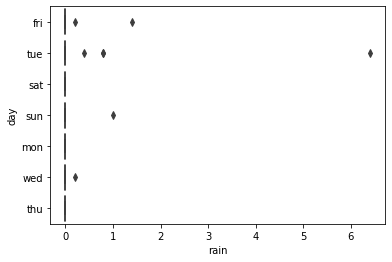

<Figure size 432x288 with 0 Axes>

In [55]:
sns.boxplot(df1['rain'], df1['day'])
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


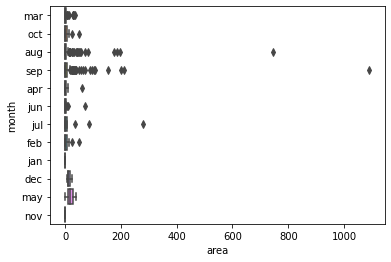

<Figure size 432x288 with 0 Axes>

In [56]:
sns.boxplot(df1['area'], df1['month'])
plt.show()
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


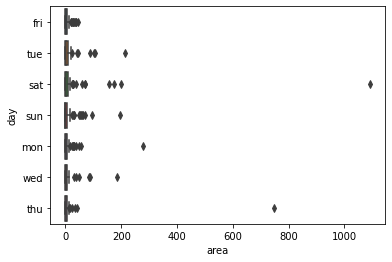

<Figure size 432x288 with 0 Axes>

In [57]:
sns.boxplot(df1['area'], df1['day'])
plt.show()
plt.tight_layout()

In [58]:
# Dropping month & day as the Data is already OHEncoded
df.drop(columns=['month','day'], inplace=True)

In [59]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [60]:
# Checking for Missing Values
df.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [61]:
X = df.drop(columns = ['size_category'])
y = df.size_category

In [62]:
y = pd.get_dummies(y, drop_first=True)

In [63]:
y

,small
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [64]:
from sklearn.preprocessing import Normalizer
scaled = Normalizer()

In [65]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X_scaled = scaled.fit_transform(X)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state=20)

In [68]:
len(X_train)

413

In [69]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense

In [70]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (28,), activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(25, activation = 'relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [71]:
model.compile(metrics = ['accuracy'],
              loss = 'binary_crossentropy',
              optimizer = 'adam')

In [72]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2900      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 9,251
Trainable params: 9,251
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.fit(X_train, y_train, epochs = 100, batch_size=8)

Epoch 1/100
52/52 [==============================] - 3s 3ms/step - loss: 0.5961 - accuracy: 0.7385
Epoch 2/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5681 - accuracy: 0.7385
Epoch 3/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5625 - accuracy: 0.7385
Epoch 4/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5432 - accuracy: 0.7385
Epoch 5/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.7530
Epoch 6/100
52/52 [==============================] - 0s 3ms/step - loss: 0.5065 - accuracy: 0.7772
Epoch 7/100
52/52 [==============================] - 0s 3ms/step - loss: 0.4502 - accuracy: 0.8015
Epoch 8/100
52/52 [==============================] - 0s 3ms/step - loss: 0.4032 - accuracy: 0.8232
Epoch 9/100
52/52 [==============================] - 0s 3ms/step - loss: 0.3309 - accuracy: 0.8620
Epoch 10/100
52/52 [==============================] - 0s 3ms/step - loss: 0.2888 - accuracy: 0.8959
Epoch 11/

In [74]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.0408 - accuracy: 0.9712


[0.040814824402332306, 0.9711538553237915]

In [75]:
from sklearn.metrics import classification_report

In [76]:
pred = model.predict(np.array(X_test))

4/4 [==============================] - 0s 3ms/step


In [77]:
y_test

,small
388,0
179,1
323,1
327,1
227,0
...,...
463,1
81,1
238,0
9,1


In [78]:
X_test

array([[1.26386360e-01, 3.02634006e-01, 9.42164987e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.38362773e-01, 2.29513923e-01, 9.57476619e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.07967344e-01, 1.62962838e-01, 9.79443558e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.19037866e-03],
       ...,
       [7.15910886e-02, 9.37262792e-02, 5.21957083e-01, ...,
        0.00000000e+00, 0.00000000e+00, 7.73957715e-04],
       [1.29968752e-01, 1.23645948e-01, 9.81580219e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.40506759e-03],
       [1.21401640e-01, 1.30496877e-01, 9.82417397e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.31815027e-03]])

In [79]:
y_pred = []
for element in pred:
  if element <= 0.5:
    y_pred.append(0)
  else:
    y_pred.append(1)

In [80]:
y_pred

[0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1]

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        31
           1       1.00      0.96      0.98        73

    accuracy                           0.97       104
   macro avg       0.96      0.98      0.97       104
weighted avg       0.97      0.97      0.97       104



In [82]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [83]:
confusion_matrix(y_test, y_pred)

array([[31,  0],
       [ 3, 70]])